In [ ]:
from google.colab import files

In [ ]:
files.upload()   # <================= Veuillez importer le fichier 'treebasednetworks.py'

Saving treebasednetworks.py to treebasednetworks.py


{'treebasednetworks.py': b'# -*- coding: utf-8 -*-\n"""TreeBasedNetworks.ipynb\n\nAutomatically generated by Colaboratory.\n\nOriginal file is located at\n    https://colab.research.google.com/drive/1nmhj-_a2ZugMWGUKZceOhr5CgsDk8gwz\n"""\n\nimport networkx as nx\nimport random\nimport matplotlib.pyplot as plt\nfrom functools import reduce\nfrom asymmetree.treeevolve.SpeciesTree import species_tree_n\nfrom asymmetree.tools.PhyloTreeTools import (to_newick,)\nfrom tralda.datastructures.Tree import Tree\n\nclass TransferManager:\n    def __init__(self):\n        pass\n\n    def add_transfer_to_tree(self, G, pw, w, pay, ay, c, attributes):\n\n        """\n            Ajoute un transfert au graphe G.\n\n            Cette fonction effectue les \xc3\xa9tapes n\xc3\xa9cessaires pour ajouter un transfert au graphe G. Elle supprime d\'abord les ar\xc3\xaates\n            entre les n\xc5\x93uds pw, w, pay et ay, puis ajoute de nouveaux n\xc5\x93uds et ar\xc3\xaates pour repr\xc3\xa9senter le tran

In [ ]:
pip install asymmetree

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.0/91.0 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.8/61.8 kB 7.3 MB/s eta 0:00:00


Nœud 1:0
Nœud 2:5
Nœud 3:10
Nœud 4:15
Nœud 5:20
Nœud 6:35
Nœud 7:35
Nœud 8:25
Nœud 9:30
Nœud 10:35
Nœud 11:35
Nœud 12:35
Nœud 13:35
Nœud 14:35


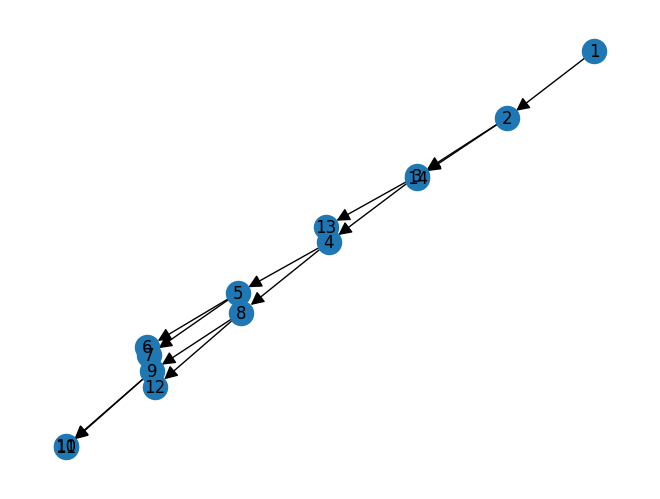

{1: {'Characters': [None, None, None], 'spece': None}, 2: {'Characters': [None, None, None], 'spece': None}, 3: {'Characters': [None, None, None], 'spece': None}, 4: {'Characters': [None, None, None], 'spece': None}, 5: {'Characters': [None, None, None], 'spece': None}, 6: {'Characters': [1, 1, 0], 'spece': 6}, 7: {'Characters': [1, 1, 1], 'spece': 7}, 8: {'Characters': [None, None, None], 'spece': None}, 9: {'Characters': [None, None, None], 'spece': None}, 10: {'Characters': [0, 0, 1], 'spece': 10}, 11: {'Characters': [1, 1, 1], 'spece': 11}, 12: {'Characters': [0, 1, 0], 'spece': 12}, 13: {'Characters': [0, 1, 1], 'spece': 13}, 14: {'Characters': [1, 1, 1], 'spece': 14}}
{1: {'Characters': [0, 0, 0], 'spece': None}, 2: {'Characters': [0, 0, 0], 'spece': None}, 3: {'Characters': [0, 0, 0], 'spece': None}, 4: {'Characters': [0, 0, 0], 'spece': None}, 5: {'Characters': [1, 1, 0], 'spece': None}, 6: {'Characters': [1, 1, 0], 'spece': 6}, 7: {'Characters': [1, 1, 1], 'spece': 7}, 8: {'Ch

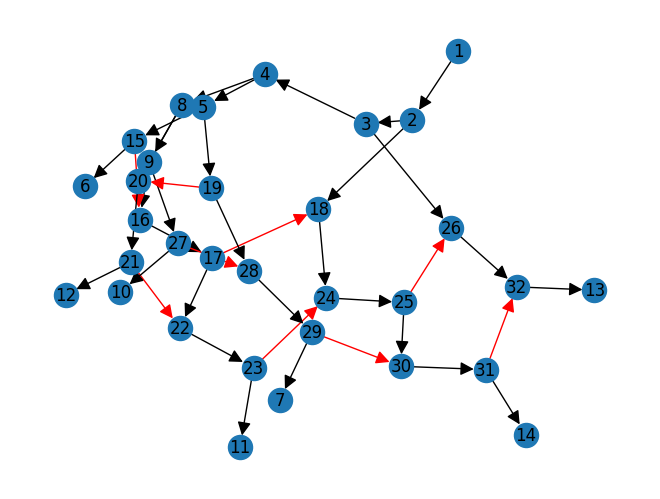

------------------------Timestamp------------------------
Nœud 1 : 0
Nœud 2 : 5
Nœud 3 : 10
Nœud 4 : 15
Nœud 5 : 20
Nœud 6 : 35
Nœud 7 : 35
Nœud 8 : 25
Nœud 9 : 30
Nœud 10 : 35
Nœud 11 : 35
Nœud 12 : 35
Nœud 13 : 35
Nœud 14 : 35
Nœud 15 : 32.5
Nœud 16 : 32.5
Nœud 17 : 33.75
Nœud 18 : 33.75
Nœud 19 : 30.000001
Nœud 20 : 30.000001
Nœud 21 : 34.375
Nœud 22 : 34.375
Nœud 23 : 34.6875
Nœud 24 : 34.6875
Nœud 25 : 34.84375
Nœud 26 : 34.84375
Nœud 27 : 32.5000005
Nœud 28 : 32.5000005
Nœud 29 : 34.921875
Nœud 30 : 34.921875
Nœud 31 : 34.9609375
Nœud 32 : 34.9609375


In [ ]:
from treebasednetworks import *
import pickle as pkl

def main():
    # Définir le nombre de caractères
    nbrCaractere = 3
    nbrLeaf=7  #       <============= sélectionner le nombre de feuilles pour l'arbre aléatoire G

    tree_builder = TreeBuilder()
    # Utilisation de la fonction "generate_tree_networkX" pour générer un arbre aléatoire à partir d'un nombre souhaité de feuilles
    G ,root_id= tree_builder.generate_tree_networkX(nbrLeaf, nbrCaractere)

    # Ajouter des timestamps aux nœuds du G
    timestamp_manager = TimestampManager()
    G=timestamp_manager.add_timestamp(G,root_id)


    # Étiquetage des feuilles de l'arbre avec des valeurs aléatoires
    labeler = LeafLabeler()
    G = labeler.label_tree_leaves(G, nbrCaractere)

    # Définition des attributs pour chaque nœud
    attributes = labeler.set_leaf_attributes(G, nbrCaractere)

    # Affichage l'arbre G avec les étiquettes des feuilles
    tree_builder.drawGraph(G)
    print(attributes)



    # ---------------------- Appeler la fonction TransferAdditionGreedy ----------------------
    # Ajouter des transferts aux nœuds de l'arbre en fonction des attributs des nœuds afin de construire un Tree-Based Network PTN.
    tree_networks= TreeBasedNetworks()
    G, attributes = tree_networks.TransferAdditionGreedy(G, attributes)
    #-----------------------------------------------------------------------------------------

    # Affichage des attributs mis à jour après l'application des transferts
    print(attributes)
    # Affichage du notre TBN G avec les nouvelles arêtes
    tree_builder.drawGraph(G)


    # Affichage des timestamps des tous les nœuds du graphe
    timestamp_manager.display_timestamps(G)

    # Sauvegarde du graphe G dans un fichier pickle
    file1= open('exemple_algo2.pkl','wb')
    pkl.dump(G,file1)

if __name__ == "__main__":
    main()
